## Exploration and Visualization ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

In [2]:
# To change between different styles, choose one of the following four lines

# default style
plt.rcParams.update(plt.rcParamsDefault)

In [3]:
plt.style.use('ggplot') 

In [4]:
plt.style.use('fivethirtyeight') 

In [5]:
# seaborn style
import seaborn as sns
sns.set_theme()

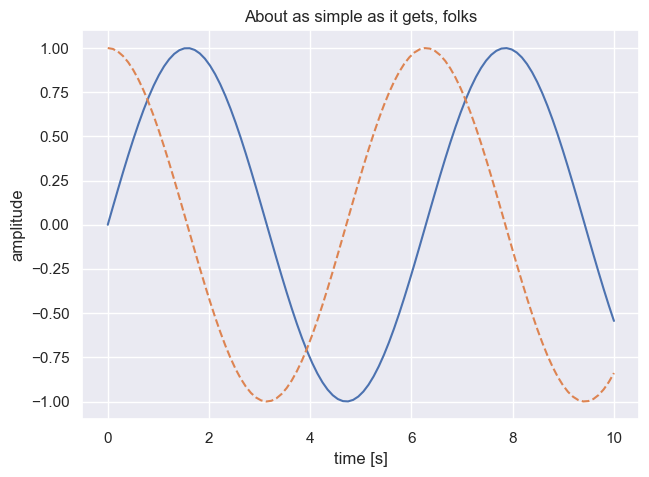

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()

ax.set(xlabel='time [s]', ylabel='amplitude', title='About as simple as it gets, folks')

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

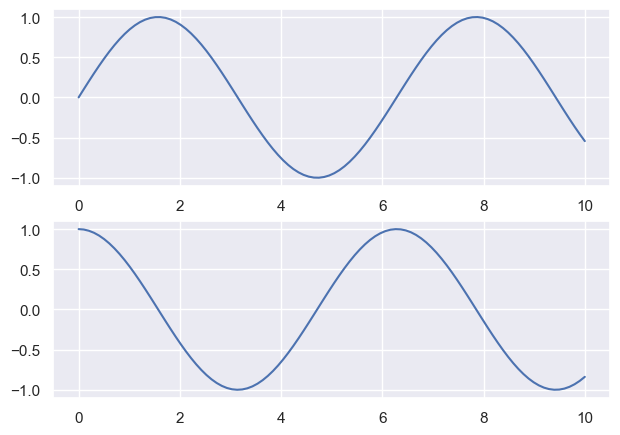

In [7]:
# Two separate plots
fig, ax = plt.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

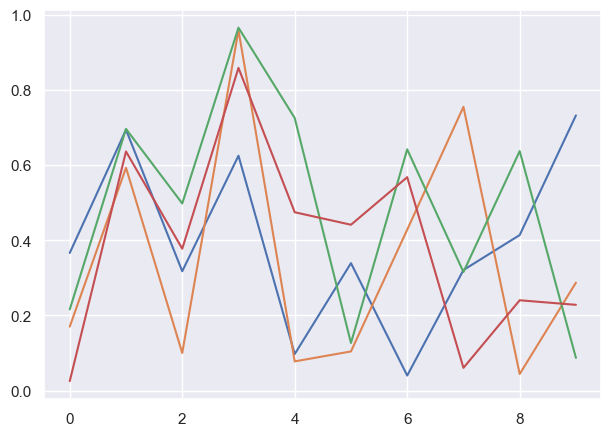

In [8]:
# Line plot 
for i in range(4):
    plt.plot(np.random.rand(10))

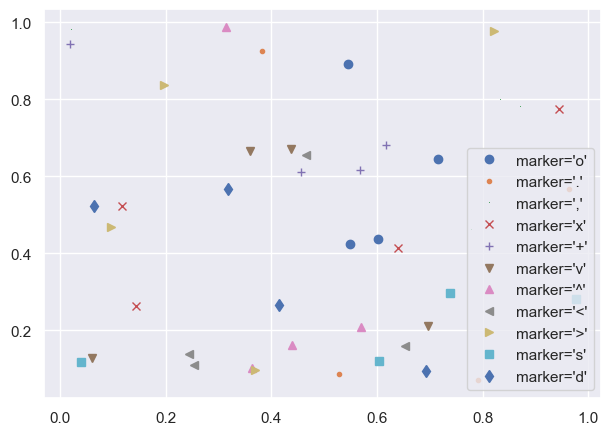

In [9]:
# Scatter plots
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(4), rng.rand(4), marker, label="marker='{0}'".format(marker))
plt.legend();

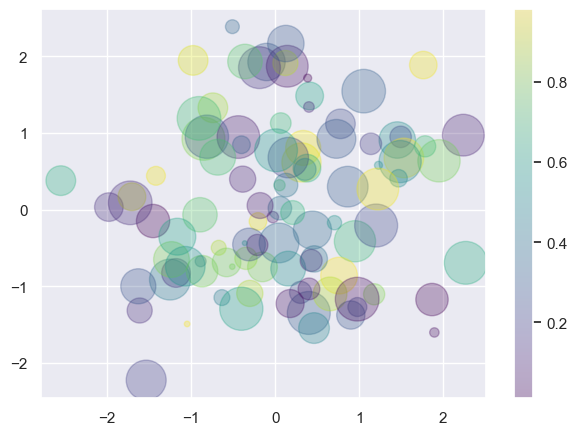

In [10]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale

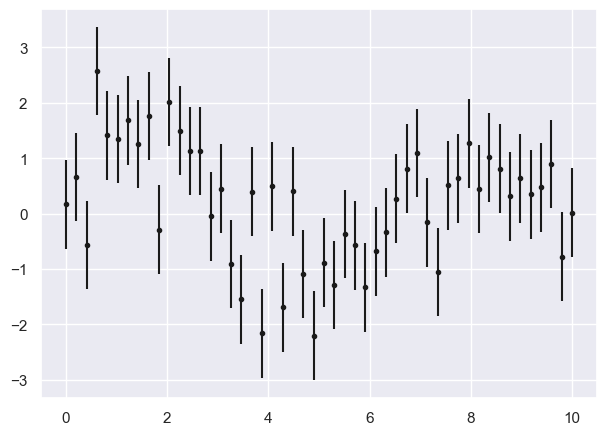

In [11]:
# Errorbars
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

[ 2.  1.  2.  1.  5.  4.  7. 17. 14. 13. 18. 33. 36. 49. 35. 57. 57. 47.
 41. 68. 79. 61. 60. 47. 40. 39. 34. 40. 25. 18. 11. 14.  8.  8.  3.  2.
  0.  2.  0.  2.]
[-2.96640501 -2.66802455 -2.36964409 -2.07126362 -1.77288316 -1.4745027
 -1.17612223 -0.87774177 -0.57936131 -0.28098085  0.01739962  0.31578008
  0.61416054  0.912541    1.21092147  1.50930193  1.80768239  2.10606286
  2.40444332  2.70282378  3.00120424  3.29958471  3.59796517  3.89634563
  4.1947261   4.49310656  4.79148702  5.08986748  5.38824795  5.68662841
  5.98500887  6.28338933  6.5817698   6.88015026  7.17853072  7.47691119
  7.77529165  8.07367211  8.37205257  8.67043304  8.9688135 ]


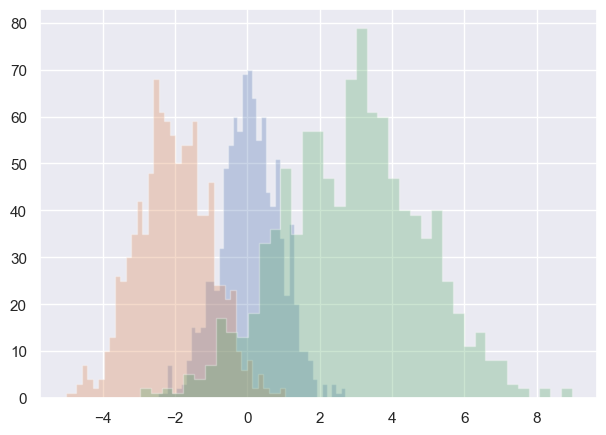

In [12]:
# Histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
counts, bin_edges, h = plt.hist(x3, **kwargs)

print(counts)
print(bin_edges)

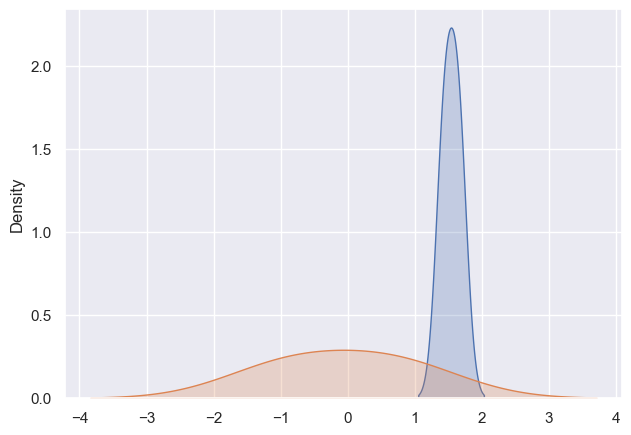

In [13]:
# Seaborn kernel density plot 
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)

for c in [0,1]:
    sns.kdeplot(data[c], fill=True)

<Axes: xlabel='x', ylabel='y'>

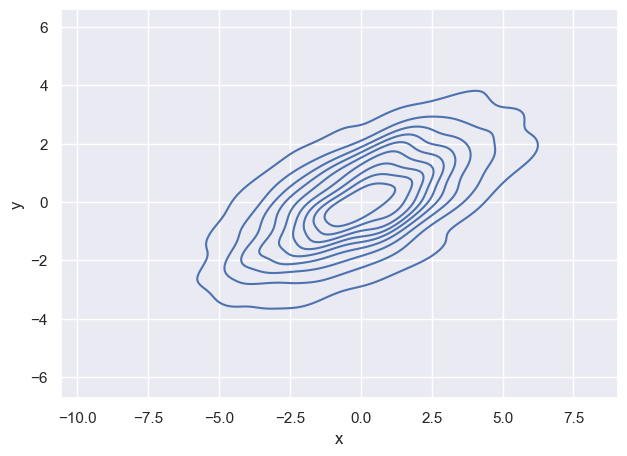

In [14]:
df = pd.DataFrame(data, columns=['x', 'y'])
sns.kdeplot(data=df,x='x',y='y')

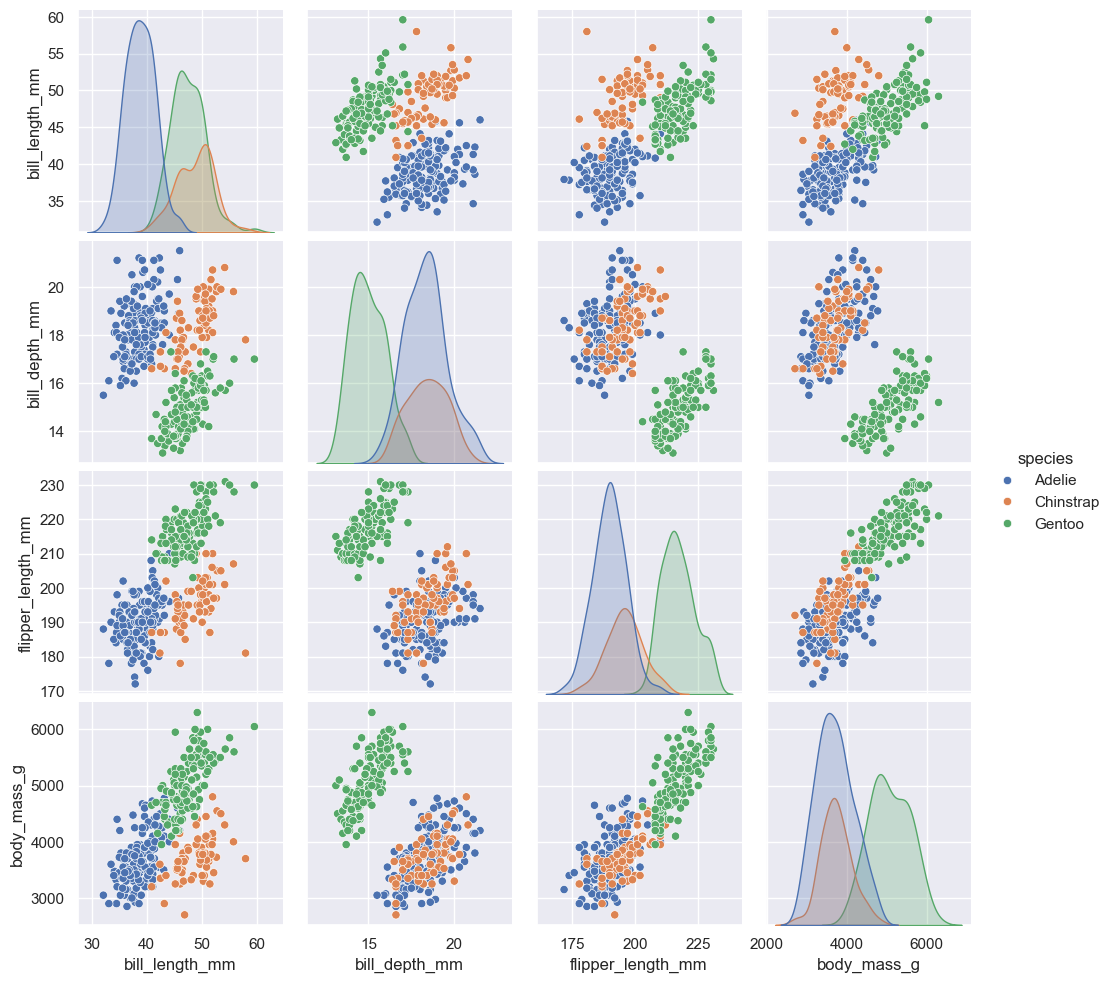

In [15]:
# Seaborn pairplot
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

# Yellowbrick

In [16]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [17]:
import sklearn
import yellowbrick
print(sklearn.__version__)
print(yellowbrick.__version__)

1.6.1
1.5


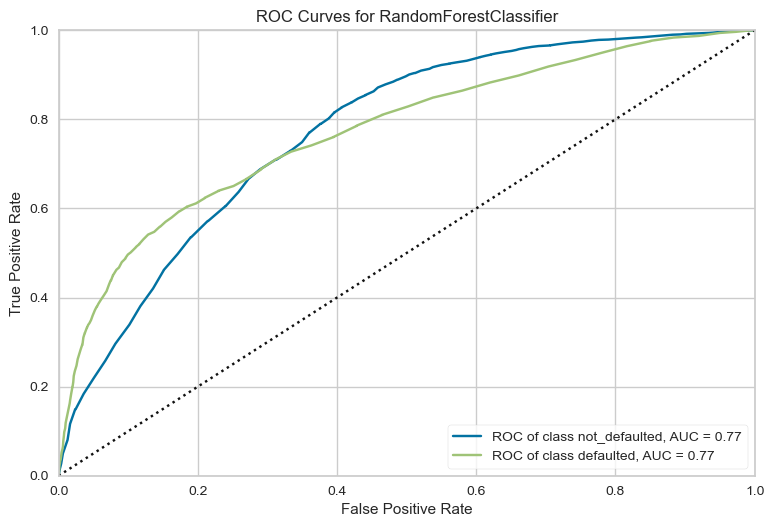

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['not_defaulted', 'defaulted'],
       estimator=RandomForestClassifier(), macro=False, micro=False)

In [18]:
# Load the classification dataset
X, y = load_credit()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Instantiate the visualizer with a classification model
#model = LogisticRegression()
model = RandomForestClassifier()
roc_auc(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, micro=False, macro=False, classes=['not_defaulted', 'defaulted'])

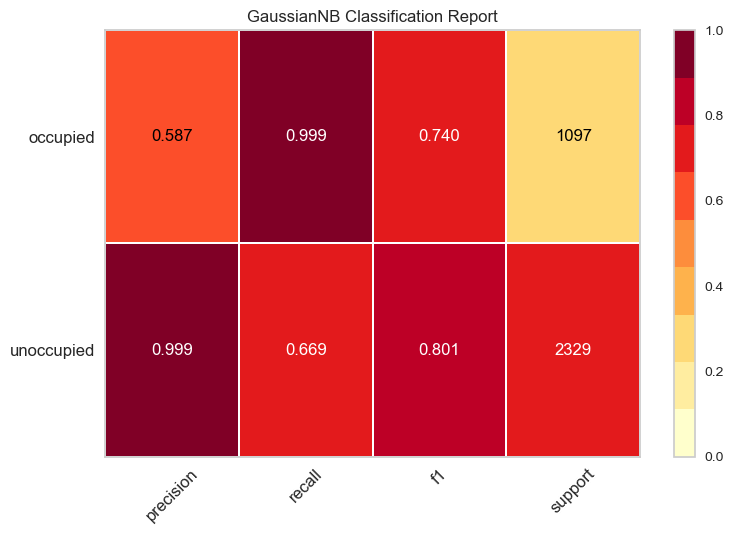

In [19]:
# Visualization of sklearn's classification_report()

from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 